In [8]:
import numpy as np
from astropy.io import fits
from astropy import units as u
import matplotlib
import matplotlib.pyplot as plt
import math

In [9]:
## Configura el tamaño de letra de las etiquetas

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24

In [21]:
### Abre el archivo Fits que contiene todas las propiedades de las galaxias la muestra.

file = 'SDSS17Pipe3D_v3_1_1.fits'

M_tb = fits.open(file)

In [23]:
M_tb.info()

Filename: SDSS17Pipe3D_v3_1_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  GAL_PROPERTIES    1 BinTableHDU   2149   10220R x 536C   [32A, K, 32A, 32A, 32A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

In [117]:
M_tb[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
AUTHOR  = 'S.F.Sanchez and IA-MANGA'                                            
VERSIOM = 'v3.1.1  '                                                            
DATE    = '2021-05-05'                                                          
COMMENT Pipe3D characteristics and integrated properties.                       

In [25]:
M_tb[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4307 / length of dimension 1                          
NAXIS2  =                10220 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  536 / number of table fields                         
EXTNAME = 'GAL_PROPERTIES'                                                      
CHECKSUM= '2DXd5AVc2AVc2AVc'                                                    
DATASUM = '2013182490'                                                          
DATE-HDU= '2021-03-25T15:34:26'                                                 
STILVERS= '3.1     '        

In [27]:
M_tb[1].columns

ColDefs(
    name = 'name'; format = '32A'
    name = 'plate'; format = 'K'
    name = 'ifudsgn'; format = '32A'
    name = 'plateifu'; format = '32A'
    name = 'mangaid'; format = '32A'
    name = 'objra'; format = 'D'
    name = 'objdec'; format = 'D'
    name = 'log_SFR_Ha'; format = 'D'
    name = 'FoV'; format = 'D'
    name = 'Re_kpc'; format = 'D'
    name = 'e_log_Mass'; format = 'D'
    name = 'e_log_SFR_Ha'; format = 'D'
    name = 'log_Mass'; format = 'D'
    name = 'log_SFR_ssp'; format = 'D'
    name = 'log_NII_Ha_cen'; format = 'D'
    name = 'e_log_NII_Ha_cen'; format = 'D'
    name = 'log_OIII_Hb_cen'; format = 'D'
    name = 'e_log_OIII_Hb_cen'; format = 'D'
    name = 'log_SII_Ha_cen'; format = 'D'
    name = 'e_log_SII_Ha_cen'; format = 'D'
    name = 'log_OII_Hb_cen'; format = 'D'
    name = 'e_log_OII_Hb_cen'; format = 'D'
    name = 'EW_Ha_cen'; format = 'D'
    name = 'e_EW_Ha_cen'; format = 'D'
    name = 'ZH_LW_Re_fit'; format = 'D'
    name = 'e_ZH_LW_Re_fit'

In [28]:
print(len(M_tb[1].data['name']))

10220


In [29]:
print(M_tb[1].data['name'])

['manga-10001-12701' 'manga-10001-12702' 'manga-10001-12703' ...
 'manga-9894-6104' 'manga-9894-9101' 'manga-9894-9102']


### Diagrama de Color

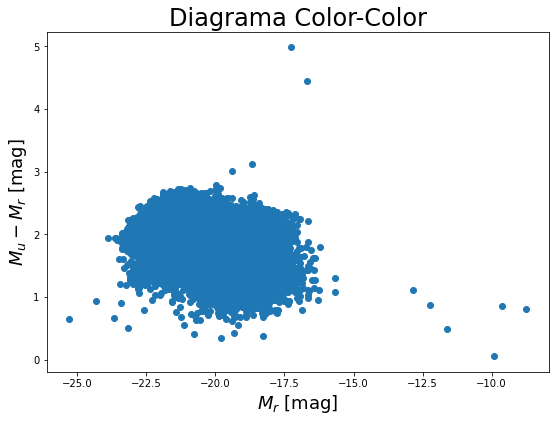

In [33]:
fig, ax = plt.subplots(1, figsize = (9, 6.25))
M_u = M_tb[1].data['u_band_abs_mag']
M_r = M_tb[1].data['r_band_abs_mag']

sc = ax.scatter(M_r, M_u - M_r)
ax.set_xlabel(r'$M_r$ [mag]')
ax.set_ylabel(r'$M_u - M_r$ [mag]')
ax.set_title('Diagrama Color-Color')

plt.show()

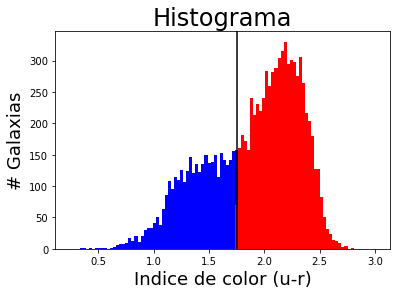

In [41]:
plt.hist(M_u - M_r, bins = 100, range = (0.25, 3), color = 'b')

c_mask = M_u - M_r > 1.75
plt.hist(M_u[c_mask] - M_r[c_mask], bins = 100, range = (0.25, 3), color = 'r')

plt.xlabel('Indice de color (u-r)')
plt.ylabel('# Galaxias')
plt.title('Histograma')

plt.axvline(x = 1.75, color = 'k')

Text(0.5, 1.0, 'Diagrama Color-Color')

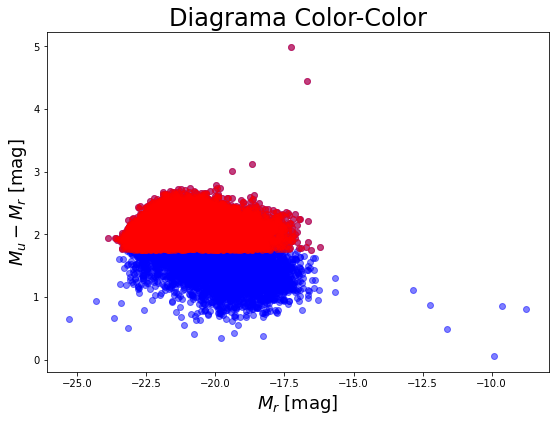

In [44]:
fig, ax = plt.subplots(1, figsize = (9, 6.25))
M_u = M_tb[1].data['u_band_abs_mag']
M_r = M_tb[1].data['r_band_abs_mag']

sc = ax.scatter(M_r, M_u - M_r, color = 'b', alpha = 0.5)
sc = ax.scatter(M_r[c_mask], (M_u - M_r)[c_mask], alpha = 0.5, color = 'r')


ax.set_xlabel(r'$M_r$ [mag]')
ax.set_ylabel(r'$M_u - M_r$ [mag]')
ax.set_title('Diagrama Color-Color')

### Relaciones de Escala

<ipython-input-49-62d55516b33e>:4: RuntimeWarning: divide by zero encountered in log10
  sc= ax.scatter(M_tb[1].data['log_Mass'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

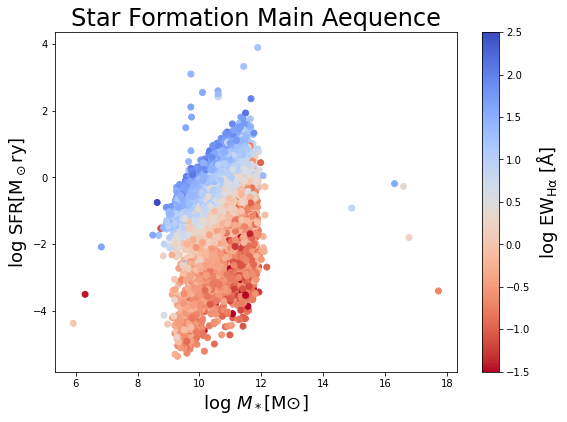

In [49]:
fig, ax = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc= ax.scatter(M_tb[1].data['log_Mass'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax.set_xlabel(r'log $M_*$[M$\odot$]')
ax.set_ylabel(r'log SFR[M$_\odot$ry]')
#ax.set_xlim(8.4, 12.3)
cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('Star Formation Main Aequence')

plt.show

<ipython-input-50-459e97af86bc>:4: RuntimeWarning: divide by zero encountered in log10
  sc1= ax1.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

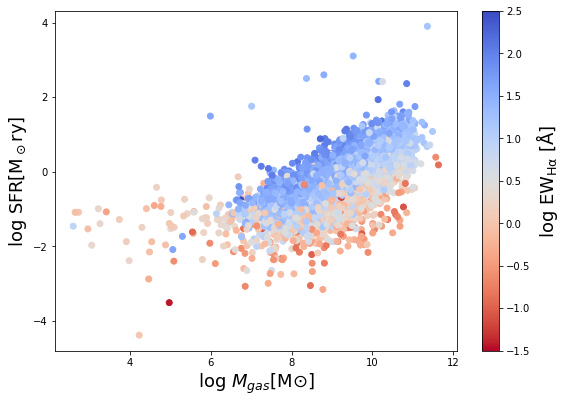

In [50]:
fig, ax1 = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc1= ax1.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax1.set_xlabel(r'log $M_{gas}$[M$\odot$]')
ax1.set_ylabel(r'log SFR[M$_\odot$ry]')
#ax.set_xlim(8.4, 12.3)
cbar = fig.colorbar(sc1)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('ley de Kennicut-Schwidt')

plt.show

<ipython-input-51-734d672d838f>:21: RuntimeWarning: divide by zero encountered in log10
  axes[0,0].scatter(M_tb[1].data['log_NII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
<ipython-input-51-734d672d838f>:23: RuntimeWarning: divide by zero encountered in log10
  axes[0,1].scatter(M_tb[1].data['log_SII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
<ipython-input-51-734d672d838f>:25: RuntimeWarning: divide by zero encountered in log10
  im=axes[0,2].scatter(M_tb[1].data['log_OI_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


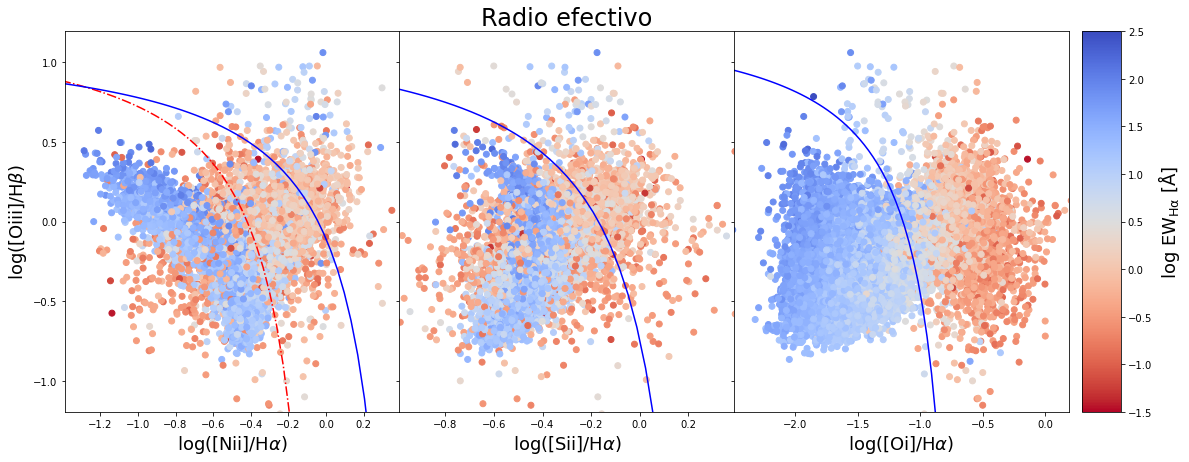

In [51]:
fig, axes = plt.subplots(1,3, figsize=(18,7), sharey=True, squeeze=False)

x_min1=-1.39
x_max1=0.39
y_min1=-1.19
y_max1=1.19

x=np.linspace(2*x_min1,2*x_max1, 100)
cut_y = -0.7+0.2-3.67*x
cut_y2=-1.7+0.5-3.67*x
cut_y3=0.61/(x-0.05)+1.3
cut_y4=0.61/(x-0.47)+1.19
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII_AGNs=1.89*(x)+0.76;
cut_y_OI=0.73/((x+0.59))+1.33;
cut_y_OI_AGNs= 1.18*(x)+1.30;
cut_y_OIII_AGNs=1.14*(x)+0.36


axes[0,0].scatter(M_tb[1].data['log_NII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
axes[0,1].scatter(M_tb[1].data['log_SII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
im=axes[0,2].scatter(M_tb[1].data['log_OI_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)


axes[0,0].plot(x[x<0], cut_y3[x<0], 'r-.')
axes[0,0].plot(x, cut_y4, 'b-')
axes[0,1].plot(x[x<0.1], cut_y_SII[x<0.1], 'b-')
axes[0,2].plot(x[x<-0.6], cut_y_OI[x<-0.6], 'b-')


axes[0,0].set_ylabel(r'log([Oiii]/H$\beta$)')
axes[0,0].set_xlabel(r'log([Nii]/H$\alpha$)')
axes[0,1].set_xlabel(r'log([Sii]/H$\alpha$)')
axes[0,2].set_xlabel(r'log([Oi]/H$\alpha$)')
axes[0,0].set_xlim(x_min1, x_max1)
axes[0,1].set_xlim(x_min1+0.4, x_max1)
axes[0,2].set_xlim(x_min1-1.1, x_max1-0.2)
axes[0,0].set_ylim(y_min1, y_max1)
plt.subplots_adjust(wspace=0)

cbar_ax=fig.add_axes([0.91, 0.125, 0.03, 0.755])
fig.colorbar(im, cax=cbar_ax, label=r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$')

axes[0,1].title.set_text('Radio efectivo')

In [52]:
x_1=M_tb[1].data['log_NII_Ha_Re']
cut_y_NII=0.61/(x_1-0.05)+1.3

x_2=M_tb[1].data['log_SII_Ha_Re']
cut_y_SII=0.61/(x_2-0.3)+1.3

mask_SFG=(np.log10(np.abs(M_tb[1].data['EW_Ha_Re']))>0.78) & (M_tb[1].data['log_OIII_Hb_Re']<cut_y_NII)& (M_tb[1].data['log_OIII_Hb_Re']<cut_y_SII) & (M_tb[1].data['log_Mass_gas_Av_gas_log_log']>0)

<ipython-input-52-afe485372fbc>:7: RuntimeWarning: divide by zero encountered in log10
  mask_SFG=(np.log10(np.abs(M_tb[1].data['EW_Ha_Re']))>0.78) & (M_tb[1].data['log_OIII_Hb_Re']<cut_y_NII)& (M_tb[1].data['log_OIII_Hb_Re']<cut_y_SII) & (M_tb[1].data['log_Mass_gas_Av_gas_log_log']>0)


<ipython-input-53-4af12340d658>:21: RuntimeWarning: divide by zero encountered in log10
  axes[0,0].scatter(M_tb[1].data['log_NII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
<ipython-input-53-4af12340d658>:25: RuntimeWarning: divide by zero encountered in log10
  axes[0,1].scatter(M_tb[1].data['log_SII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
<ipython-input-53-4af12340d658>:29: RuntimeWarning: divide by zero encountered in log10
  im=axes[0,2].scatter(M_tb[1].data['log_OI_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


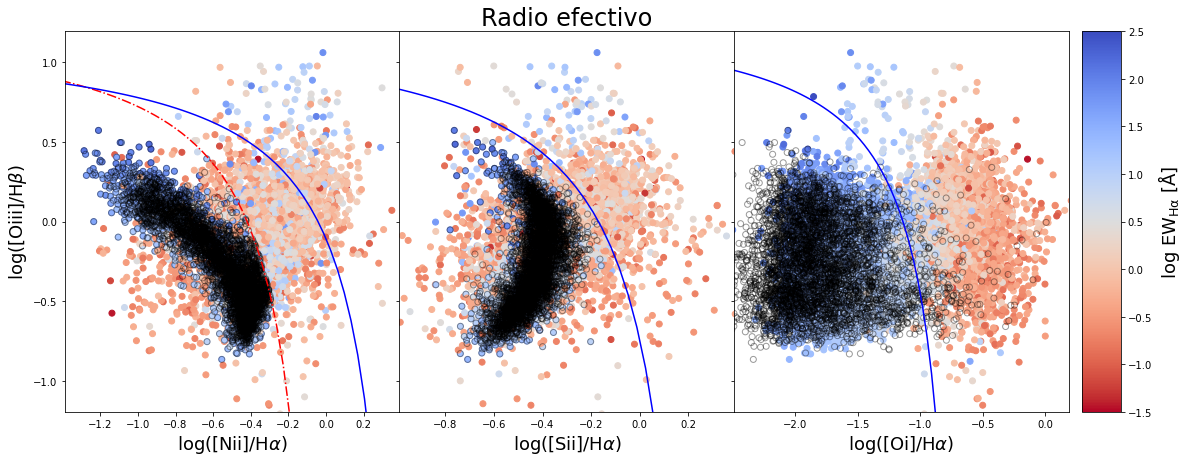

In [53]:
fig, axes = plt.subplots(1,3, figsize=(18,7), sharey=True, squeeze=False)

x_min1=-1.39
x_max1=0.39
y_min1=-1.19
y_max1=1.19

x=np.linspace(2*x_min1,2*x_max1, 100)
cut_y = -0.7+0.2-3.67*x
cut_y2=-1.7+0.5-3.67*x
cut_y3=0.61/(x-0.05)+1.3
cut_y4=0.61/(x-0.47)+1.19
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII_AGNs=1.89*(x)+0.76;
cut_y_OI=0.73/((x+0.59))+1.33;
cut_y_OI_AGNs= 1.18*(x)+1.30;
cut_y_OIII_AGNs=1.14*(x)+0.36


axes[0,0].scatter(M_tb[1].data['log_NII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
axes[0,0].scatter(M_tb[1].data['log_NII_Ha_Re'][mask_SFG], M_tb[1].data['log_OIII_Hb_Re'][mask_SFG],facecolors='none',\
                edgecolors='black',alpha=0.4)
axes[0,1].scatter(M_tb[1].data['log_SII_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
axes[0,1].scatter(M_tb[1].data['log_SII_Ha_Re'][mask_SFG], M_tb[1].data['log_OIII_Hb_Re'][mask_SFG],facecolors='none',\
                edgecolors='black',alpha=0.4)
im=axes[0,2].scatter(M_tb[1].data['log_OI_Ha_Re'], M_tb[1].data['log_OIII_Hb_Re'],c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
axes[0,2].scatter(M_tb[1].data['log_OI_Ha_cen'][mask_SFG], M_tb[1].data['log_OIII_Hb_Re'][mask_SFG],facecolors='none',\
                edgecolors='black',alpha=0.4)

axes[0,0].plot(x[x<0], cut_y3[x<0], 'r-.')
axes[0,0].plot(x, cut_y4, 'b-')
axes[0,1].plot(x[x<0.1], cut_y_SII[x<0.1], 'b-')
axes[0,2].plot(x[x<-0.6], cut_y_OI[x<-0.6], 'b-')


axes[0,0].set_ylabel(r'log([Oiii]/H$\beta$)')
axes[0,0].set_xlabel(r'log([Nii]/H$\alpha$)')
axes[0,1].set_xlabel(r'log([Sii]/H$\alpha$)')
axes[0,2].set_xlabel(r'log([Oi]/H$\alpha$)')
axes[0,0].set_xlim(x_min1, x_max1)
axes[0,1].set_xlim(x_min1+0.4, x_max1)
axes[0,2].set_xlim(x_min1-1.1, x_max1-0.2)
axes[0,0].set_ylim(y_min1, y_max1)
plt.subplots_adjust(wspace=0)

cbar_ax=fig.add_axes([0.91, 0.125, 0.03, 0.755])
fig.colorbar(im, cax=cbar_ax, label=r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$')

axes[0,1].title.set_text('Radio efectivo')

<ipython-input-54-8d1f049279a1>:4: RuntimeWarning: divide by zero encountered in log10
  sc= ax.scatter(M_tb[1].data['log_Mass'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

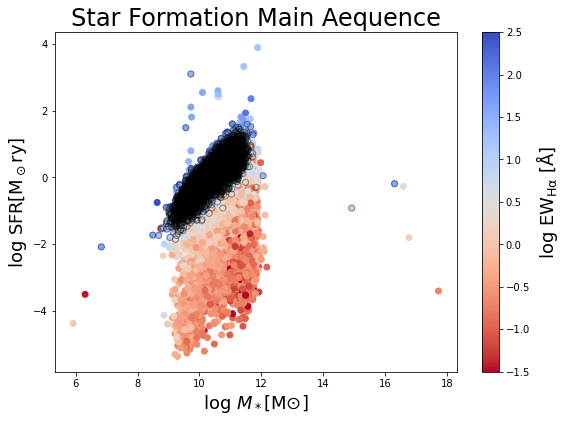

In [54]:
fig, ax = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc= ax.scatter(M_tb[1].data['log_Mass'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax.scatter(M_tb[1].data['log_Mass'][mask_SFG], M_tb[1].data['log_SFR_Ha'][mask_SFG], facecolors='none',\
                edgecolors='black',alpha=0.4)
ax.set_xlabel(r'log $M_*$[M$\odot$]')
ax.set_ylabel(r'log SFR[M$_\odot$ry]')
#ax.set_xlim(8.4, 12.3)
cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('Star Formation Main Aequence')

plt.show

<ipython-input-55-f893b48bf496>:4: RuntimeWarning: divide by zero encountered in log10
  sc1= ax1.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

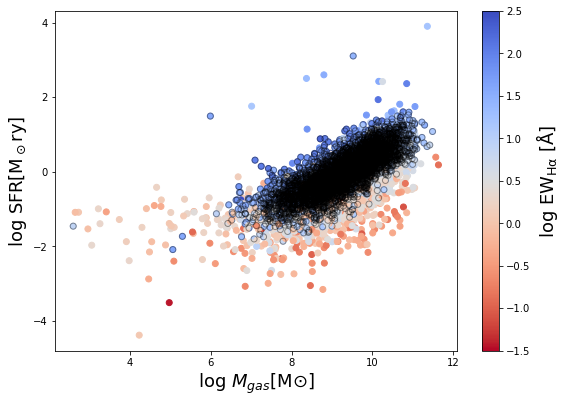

In [55]:
fig, ax1 = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc1= ax1.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax1.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'][mask_SFG], M_tb[1].data['log_SFR_Ha'][mask_SFG], facecolors='none',\
                edgecolors='black',alpha=0.4) 
ax1.set_xlabel(r'log $M_{gas}$[M$\odot$]')
ax1.set_ylabel(r'log SFR[M$_\odot$ry]')
#ax.set_xlim(8.4, 12.3)
cbar = fig.colorbar(sc1)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('ley de Kennicut-Schwidt')

plt.show

### Ajustes Lineales

In [56]:
lin_fit = np.polyfit(M_tb[1].data['log_Mass'][mask_SFG], M_tb[1].data['log_SFR_Ha'][mask_SFG],1)
lin_fit

array([ 0.78880621, -8.16700596])

In [57]:
y_fun = (lin_fit[0]*M_tb[1].data['log_Mass'][mask_SFG] + lin_fit[1])

<ipython-input-65-f91e23f07bbc>:4: RuntimeWarning: divide by zero encountered in log10
  sc= ax.scatter(M_tb[1].data['log_Mass'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

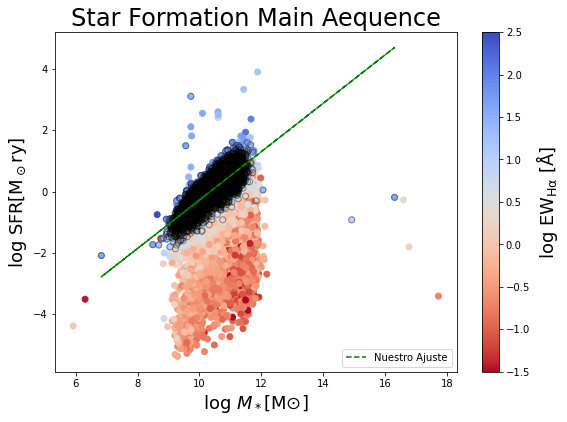

In [65]:
fig, ax = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc= ax.scatter(M_tb[1].data['log_Mass'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax.scatter(M_tb[1].data['log_Mass'][mask_SFG], M_tb[1].data['log_SFR_Ha'][mask_SFG], facecolors='none',\
                edgecolors='black',alpha=0.4)
plt.plot(M_tb[1].data['log_Mass'][mask_SFG], y_fun, 'g--', label = 'Nuestro Ajuste')
ax.set_xlabel(r'log $M_*$[M$\odot$]')
ax.set_ylabel(r'log SFR[M$_\odot$ry]')
#ax.set_xlim(8.4, 12.3)
cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('Star Formation Main Aequence')
plt.legend( loc = 'lower right')

plt.show

In [72]:
lin_fit2 = np.polyfit(M_tb[1].data['log_Mass_gas_Av_gas_log_log'][mask_SFG], M_tb[1].data['log_SFR_Ha'][mask_SFG],1)
lin_fit2

array([ 0.53510268, -4.98328057])

In [75]:
y_fun2 = (lin_fit2[0]*M_tb[1].data['log_Mass_gas_Av_gas_log_log'][mask_SFG] + lin_fit2[1])

<ipython-input-76-16eff5ba1fc9>:4: RuntimeWarning: divide by zero encountered in log10
  sc= ax.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

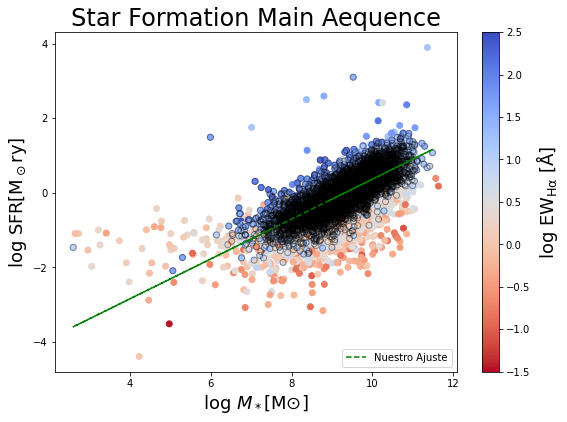

In [76]:
fig, ax = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc= ax.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'], M_tb[1].data['log_SFR_Ha'], c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
                cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax.scatter(M_tb[1].data['log_Mass_gas_Av_gas_log_log'][mask_SFG], M_tb[1].data['log_SFR_Ha'][mask_SFG], facecolors='none',\
                edgecolors='black',alpha=0.4)
plt.plot(M_tb[1].data['log_Mass_gas_Av_gas_log_log'][mask_SFG], y_fun2, 'g--', label = 'Nuestro Ajuste')
ax.set_xlabel(r'log $M_*$[M$\odot$]')
ax.set_ylabel(r'log SFR[M$_\odot$ry]')
#ax.set_xlim(8.4, 12.3)
cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('Star Formation Main Aequence')
plt.legend( loc = 'lower right')

plt.show

### Cantidades Intensivas

In [80]:
elip = M_tb[1].data['ellip']

b_a = np.sqrt(1 - elip**2)

b_a

array([0.417013, 0.598115, 0.378034, ..., 0.773976, 0.780211, 0.484479])

In [82]:
Area = (4*np.pi*(M_tb[1].data['Re_kpc']*1000)**2)/b_a

Sigma_Mst = M_tb[1].data['log_Mass'] - np.log10(Area)
Sigma_SFR = M_tb[1].data['log_SFR_Ha'] - np.log10(Area)
Sigma_Mgas = M_tb[1].data['log_Mass_gas_Av_gas_log_log'] - np.log10(Area)

<ipython-input-109-c8d7f5ae0ec3>:4: RuntimeWarning: divide by zero encountered in log10
  sc= ax.scatter(Sigma_Mst, Sigma_SFR, c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

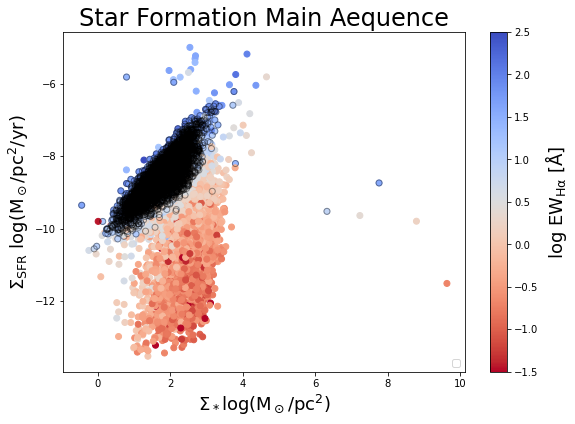

In [109]:
fig, ax = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc= ax.scatter(Sigma_Mst, Sigma_SFR, c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
               cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax.scatter(Sigma_Mst[mask_SFG], Sigma_SFR[mask_SFG], facecolors='none',\
                edgecolors='black',alpha=0.4)
ax.set_xlabel(r'$\Sigma_* $log(M$_\odot$/pc$^2$)')
ax.set_ylabel(r'$\Sigma_{\rm SFR}$ log(M$_\odot$/pc$^2$/yr)')
#Arreglar los Labels
cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('Star Formation Main Aequence')
plt.legend( loc = 'lower right')

plt.show

In [112]:
lin_fit3 = np.polyfit(Sigma_Mst[mask_SFG], Sigma_SFR[mask_SFG],1)
lin_fit3

array([  0.90331896, -10.1708707 ])

In [113]:
y_fun3 = (lin_fit3[0]*Sigma_Mst[mask_SFG]+ lin_fit3[1])

<ipython-input-115-4f77a52bad71>:4: RuntimeWarning: divide by zero encountered in log10
  sc= ax.scatter(Sigma_Mst, Sigma_SFR, c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

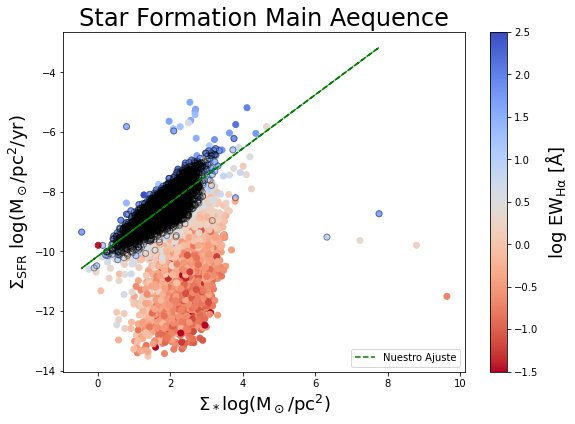

In [115]:
fig, ax = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc= ax.scatter(Sigma_Mst, Sigma_SFR, c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
               cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax.scatter(Sigma_Mst[mask_SFG], Sigma_SFR[mask_SFG], facecolors='none',\
                edgecolors='black',alpha=0.4)
plt.plot(Sigma_Mst[mask_SFG], y_fun3, 'g--', label = 'Nuestro Ajuste')
ax.set_xlabel(r'$\Sigma_* $log(M$_\odot$/pc$^2$)')
ax.set_ylabel(r'$\Sigma_{\rm SFR}$ log(M$_\odot$/pc$^2$/yr)')
#Arreglar los Labels
cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('Star Formation Main Aequence')
plt.legend( loc = 'lower right')

plt.show

In [97]:
lin_fit4 = np.polyfit(Sigma_Mgas[mask_SFG], Sigma_SFR[mask_SFG],1)
lin_fit4

array([ 0.57959083, -8.97507909])

In [100]:
y_fun4 = (lin_fit4[0]*Sigma_Mgas[mask_SFG]+ lin_fit4[1])

<ipython-input-107-56b414100ca9>:4: RuntimeWarning: divide by zero encountered in log10
  sc= ax.scatter(Sigma_Mgas, Sigma_SFR, c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\


<function matplotlib.pyplot.show(close=None, block=None)>

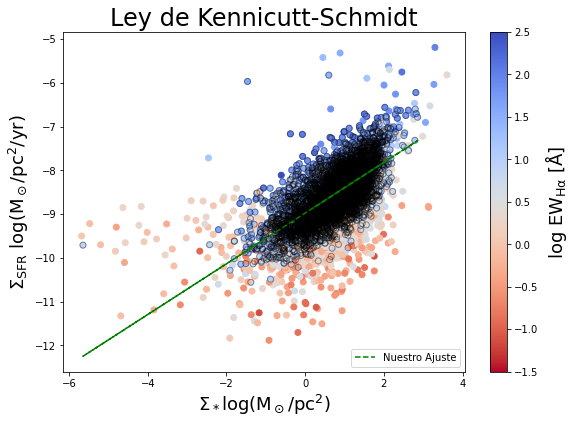

In [107]:
fig, ax = plt.subplots(1, figsize=(9,6.25))
color_cm_now='coolwarm_r'

sc= ax.scatter(Sigma_Mgas, Sigma_SFR, c=np.log10(np.abs(M_tb[1].data['EW_Ha_Re'])),\
               cmap='coolwarm_r', vmin=-1.5, vmax=2.5)
ax.scatter(Sigma_Mgas[mask_SFG], Sigma_SFR[mask_SFG], facecolors='none',\
                edgecolors='black',alpha=0.4)
plt.plot(Sigma_Mgas[mask_SFG], y_fun4, 'g--', label = 'Nuestro Ajuste')
ax.set_xlabel(r'$\Sigma_* $log(M$_\odot$/pc$^2$)')
ax.set_ylabel(r'$\Sigma_{\rm SFR}$ log(M$_\odot$/pc$^2$/yr)')
#Arreglar los Labels
cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')
ax.set_title('Ley de Kennicutt-Schmidt')
plt.legend( loc = 'lower right')

plt.show